In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors
import os

In [7]:
#Import true Data
stri="GA-04"
#C:\Users\ameya\OneDrive - University of Pittsburgh\Eclipse\TestingData\NewShiftedFiles
directory="C:/Users/ameya/OneDrive - University of Pittsburgh/Eclipse/TestingData/NewShiftedFiles/"+stri +".txt"
#directory="C:/Users/asv26/OneDrive - University of Pittsburgh/Eclipse/DataFiles/OctData/"+stri
Data3=np.loadtxt(directory,delimiter=",")
Data3=Data3.T
Data3[0]=Data3[0]/2

#index=2
#newVData3=Data3[0][index:-1]
#newTData3=Data3[1][index:-1]-Data3[1][index]
#newData3=np.array([newVData3.T,newTData3.T])
newData3=Data3
print(newData3)

fsData3=1/np.mean(np.diff(newData3[1]))
print(fsData3)

[[-4.63575450e-01  1.36967276e+00  1.36929730e+00 ...  1.12841766e+00
   1.12838952e+00  1.12838503e+00]
 [ 4.79615923e+01  4.79639424e+01  4.79663295e+01 ...  4.38751032e+03
   4.38751267e+03  4.38751502e+03]]
425.11793691070045


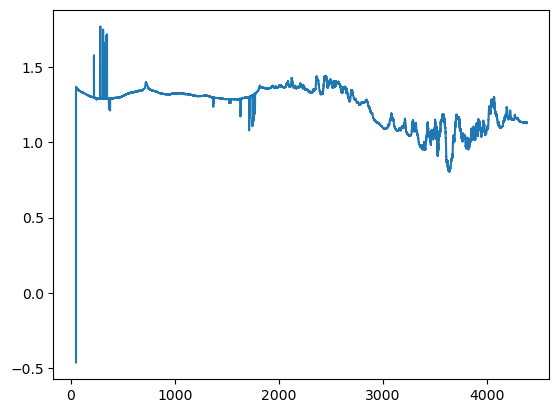

In [8]:
plt.plot(newData3[1],newData3[0])

In [25]:
timediff=np.diff(newData3[1])
tmean=np.mean(timediff)
tstd=np.std(timediff)

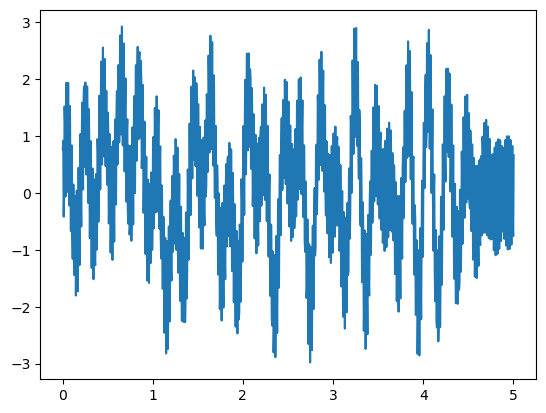

In [85]:
#Def Sample Data
n=1000
sampt=np.sort(np.linspace(0,5,n)+np.random.normal(tmean,2*tstd,n))
def sampVfunc(t):
    return np.sin(2*np.pi*5*t)+np.sin(2*np.pi*52*t)+np.sin(2*np.pi*0.5*t**2)+0*(np.random.random(len(t))-0.5)
sampv=sampVfunc(sampt)
plt.plot(sampt,sampv)

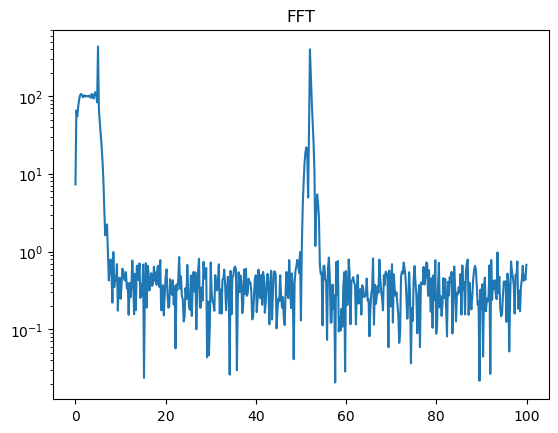

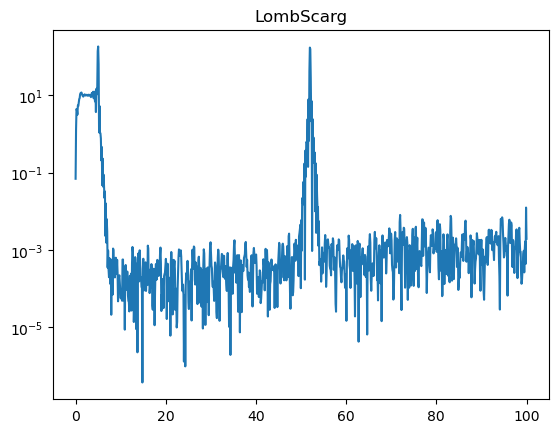

In [86]:
windowedD=scipy.signal.tukey(len(sampv),0.25)*scipy.signal.detrend(sampv)
freq=scipy.fft.rfftfreq(len(windowedD))
val=np.abs(scipy.fft.rfft(windowedD))
plt.plot(freq*n/max(sampt),val)
plt.yscale("log")
plt.title("FFT")
plt.show()


result=scipy.signal.lombscargle(sampt,windowedD,np.linspace(0.01,100,1000)*(2*np.pi))
plt.plot(np.linspace(0.01,100,1000),result)
plt.title("LombScarg")
plt.yscale("log")
plt.show()
